In [19]:
# autoreloading magic
%load_ext autoreload
%autoreload 2

# this adds the parent directory into the path, since we want simulations from the parent directory
import sys; sys.path.insert(0, '..')

import pandas as pd
import numpy as np
from simulator import Simulator, Demand, run_simulations
from resources import BasicResource, ResourcePackage, BasicCallData, BasicGas, Basefee
from resources import IndependentResources, CorrelatedResources, IndividualResources, JointResources
from oracle import Oracle
import matplotlib.pyplot as plt

# save into hdf5 file
import os
import h5py
import uuid

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [20]:
bf_standard_value = 38.100002694
bf_standard = Basefee(1.0 / 8, 15000000, 30000000, bf_standard_value)

# Single-dimensional EIP-1559 Simulation

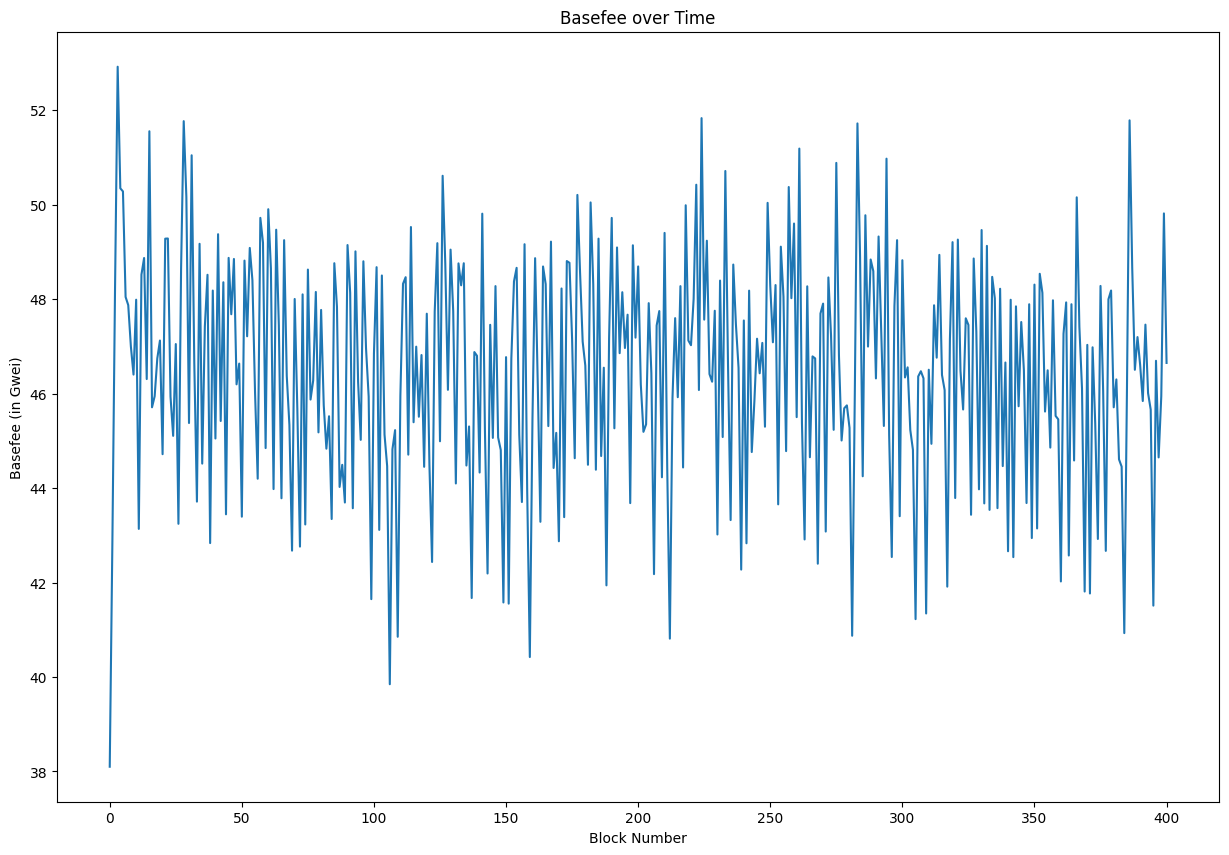

In [15]:
resource_package = IndependentResources(["gas",""],[1.0,0.0],bf_standard)
demand = Demand(2000, 0, 400, resource_package)
sim = Simulator(demand)
basefees_data, block_data, mempools_data = sim.simulate(400)

plt.rcParams["figure.figsize"] = (15,10)
plt.title("Basefee over Time")
plt.xlabel("Block Number")
plt.ylabel("Basefee (in Gwei)")
plt.plot(basefees_data["gas"])

# Multidimensional EIP-1559 Simulation with X+Y=Z method

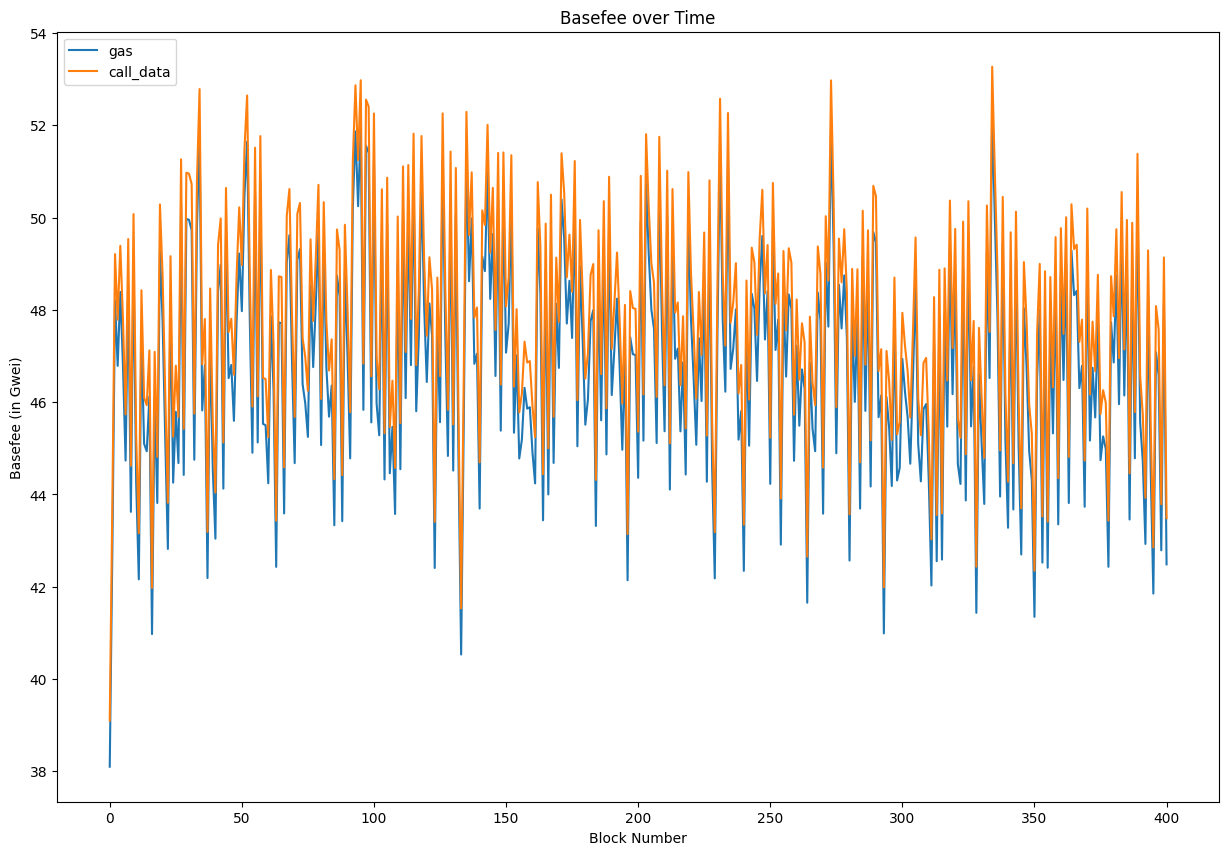

In [22]:
resource_package = CorrelatedResources(["gas","call_data"],[0.7,0.3],bf_standard)
demand = Demand(2000, 0, 400, resource_package)
sim = Simulator(demand)
basefees_data, block_data, mempools_data = sim.simulate(400)

plt.rcParams["figure.figsize"] = (15,10)
plt.title("Basefee over Time")
plt.xlabel("Block Number")
plt.ylabel("Basefee (in Gwei)")
plt.plot(basefees_data["gas"], label="gas")
basefees_data_space = [x+1 for x in basefees_data["call_data"]]
plt.plot(basefees_data_space, label="call_data")
plt.legend(loc="upper left")

# Multidimensional EIP-1559 Simulation with X+Y method

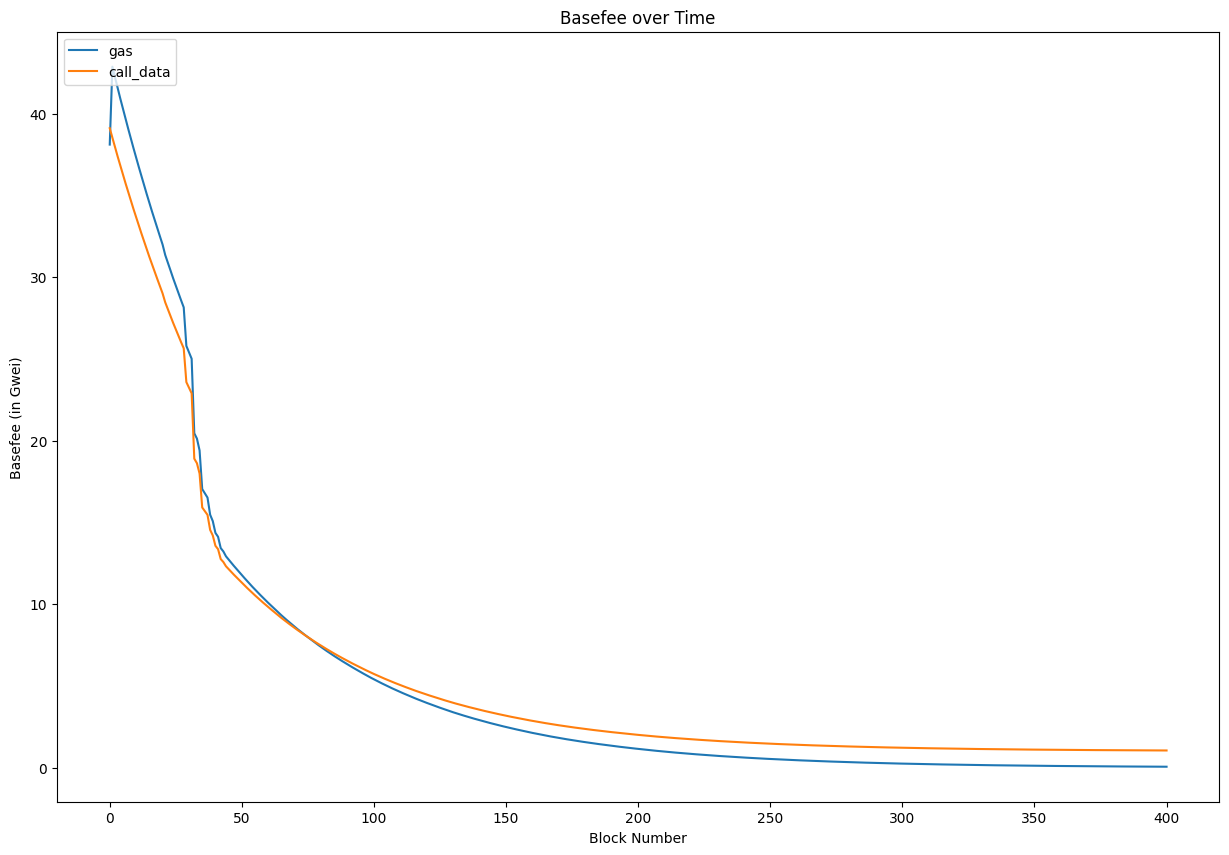

In [24]:
j = JointResources(["gas","call_data"])
demand = Demand(2000, 0, 400, j)
sim = Simulator(demand)
basefees_data, block_data, mempools_data = sim.simulate(400)

plt.rcParams["figure.figsize"] = (15,10)
plt.title("Basefee over Time")
plt.xlabel("Block Number")
plt.ylabel("Basefee (in Gwei)")
plt.plot(basefees_data["gas"], label="gas")
basefees_data_space = [x+1 for x in basefees_data["call_data"]]
plt.plot(basefees_data_space, label="call_data")
plt.legend(loc="upper left")